$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 3$
---
Tristan Malatyński AIDA 1
---

# 3.1 Convolutional Neural Networks - Introduction


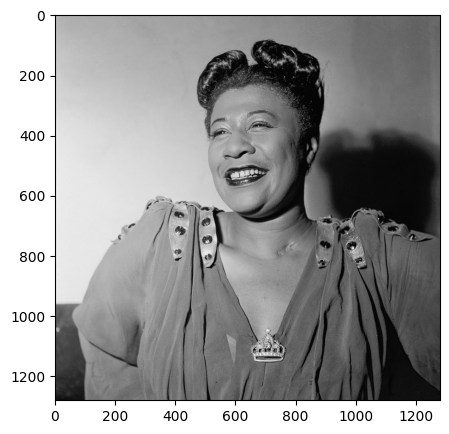

In [1]:
#Load an image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)


response = requests.get('https://cdn.pixabay.com/photo/2016/05/11/18/57/ella-fitzgerald-1386214_1280.jpg')
img = Image.open(BytesIO(response.content))


plt.imshow(img)

X_img.shape=(1280, 1280, 3)
X.shape=(1280, 1280)


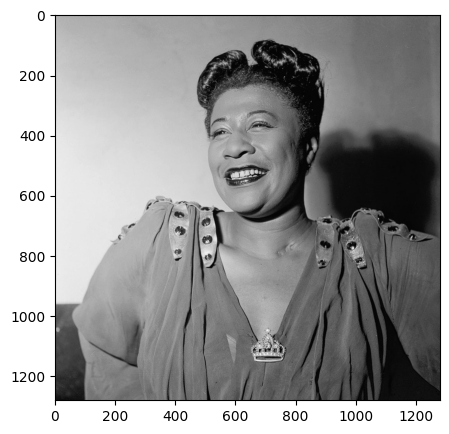

In [2]:
import numpy as np
X_img = np.array(img)
print(f'X_img.shape={X_img.shape}')

X=X_img[:,:,0]
print(f'X.shape={X.shape}')
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(X)

## Convolution 2D

During the convolution a small filter F slides along an image X.
Then the filter elements are multiplied by corresponding pixel values and summed. Convolution can be used to blurr an image, but also detect edges or extract gradients of pixel intensity.

[Diagram](https://miro.medium.com/max/928/0*e-SMFTzO8r7skkpc)


In [3]:
def conv2D(X,F,bias=0):
  w = F.shape[1]//2
  h = F.shape[0]//2
  Y=[ [ np.sum(X[i-h:i+h+1,j-w:j+w+1]*F) + bias for j in np.arange(w,X.shape[1]-w)] for i in np.arange(h,X.shape[0]-h)]
  return np.array(Y)

In [4]:
def apply_two_convolutions(X):
  F_sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  F_sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  XX = conv2D(X,F_sobel_x,1)
  XY = conv2D(X,F_sobel_y,1)
  return XX,XY

AX,AY = apply_two_convolutions(X)

In [5]:
print(f'X.shape={X.shape} AX.shape={AX.shape} AY.shape={AY.shape}')

X.shape=(1280, 1280) AX.shape=(1278, 1278) AY.shape=(1278, 1278)


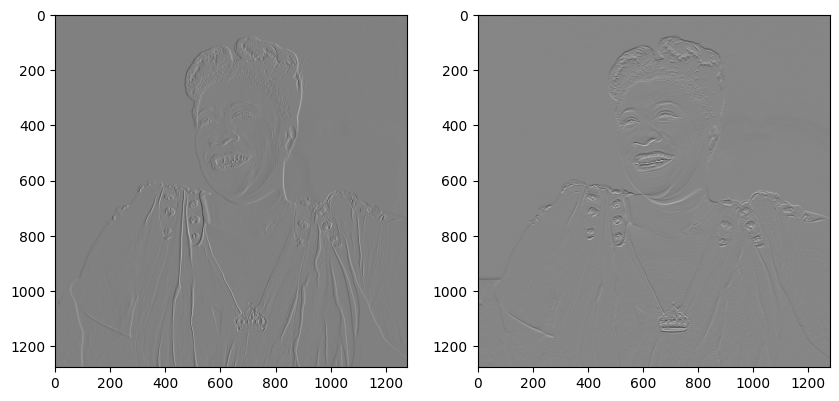

In [6]:
def plot(X,Y,cmap='gray'):
  fig = plt.figure(figsize=(10,10))
  plt.set_cmap(cmap)
  fig.add_subplot(1,2,1)
  # plt.axis('off')
  plt.imshow(X)
  fig.add_subplot(1,2,2)
  plt.imshow(Y)

plot(AX,AY)

During max pooling a window slides through an image (the strides are equal to the window sizes). At each position the maximal value of the pixel within the window is selected. Max pooling shrinks the image size.

image size:(639, 639)


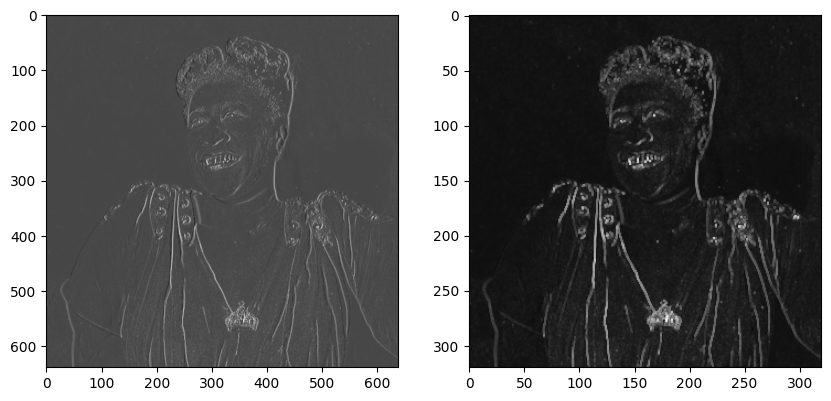

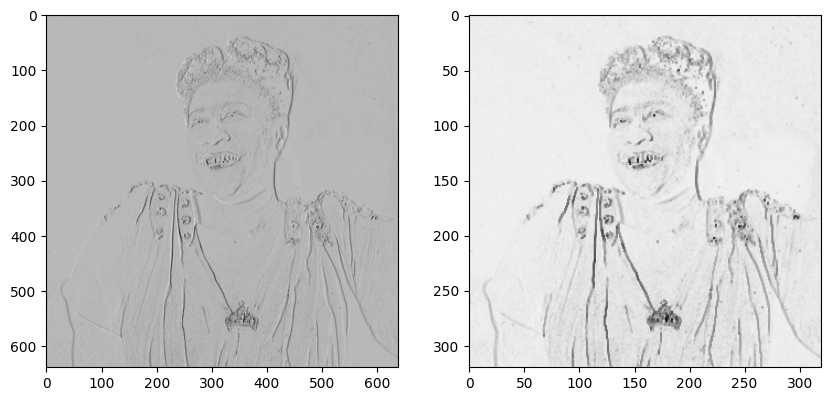

In [7]:
def maxPool2D(X,shape):
  w = shape[1]
  h = shape[0]
  # print(f'h={h} w={w}')
  Y=[ [ np.max(X[i:i+h+1,j:j+w+1]) for j in np.arange(0,X.shape[1],shape[1])] for i in np.arange(0,X.shape[0],shape[0])]
  return np.array(Y)

AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

We will repeat the convolution and max-pooling steps several times...

image size:(319, 319)


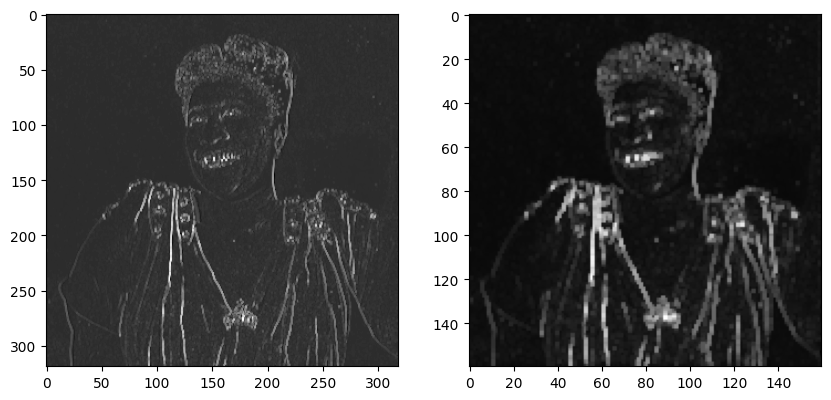

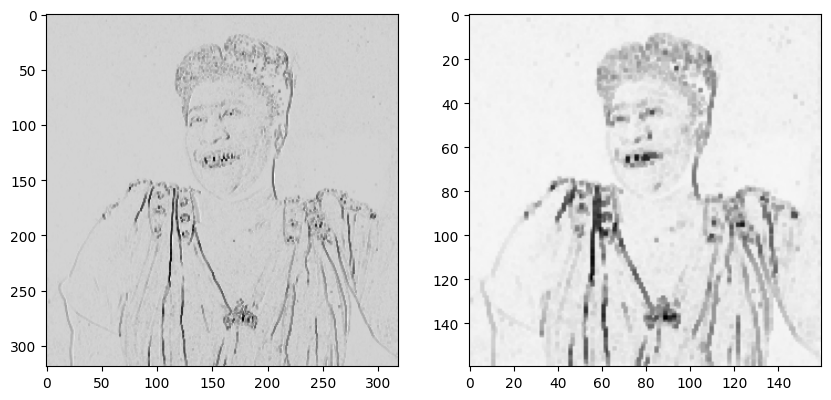

In [8]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(159, 159)


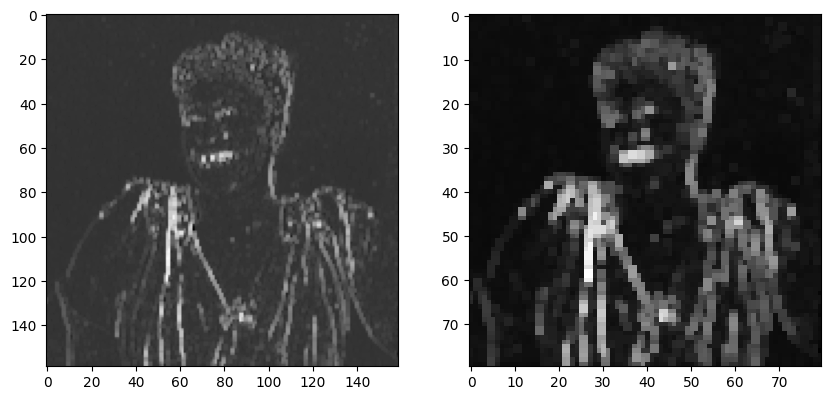

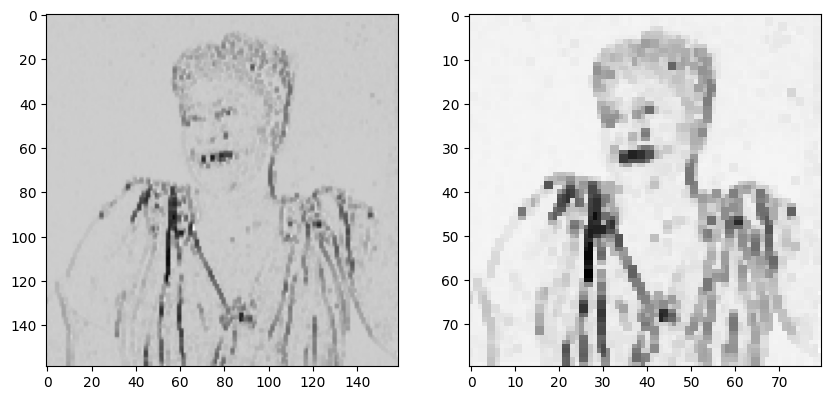

In [9]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(79, 79)


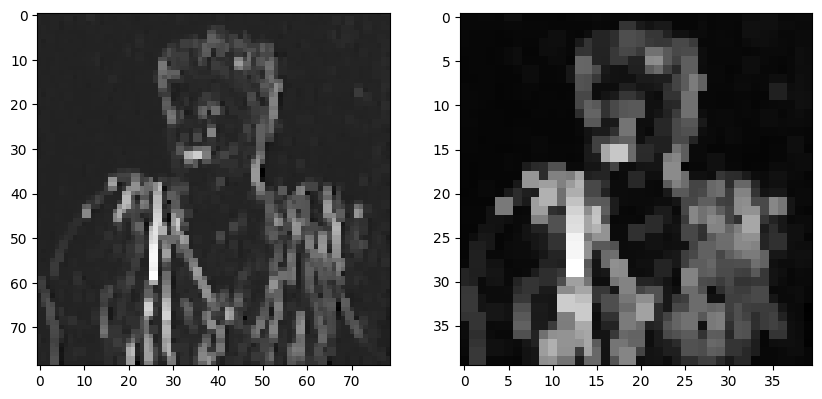

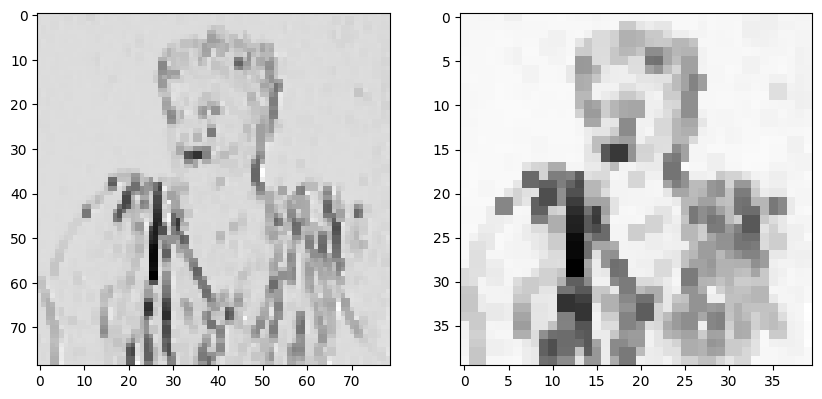

In [10]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(39, 39)


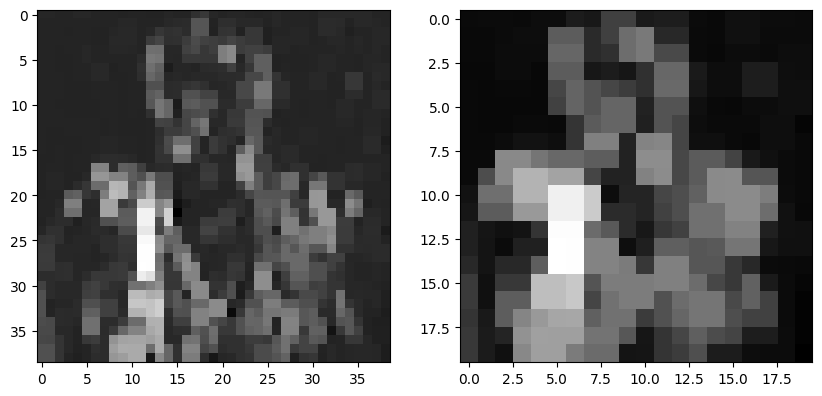

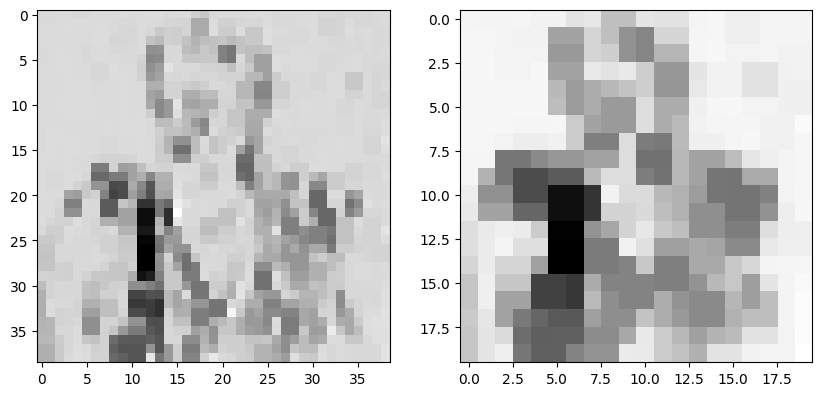

In [11]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

Probably the last convolution went too far...

Then the image is flattened (converted to a vector) and submitted as input to next processing steps (e.g. classification).

In [12]:
AX_flattended = AX.flatten()
print(f'After flattening: {AX_flattended.shape}')

After flattening: (1521,)


## CNN

Typical process in image recogntion (old approach):

**Feature extraction**
1.   Preprocess an image (eg. apply filters, convert to grayscale)
2.   Select a convolution filter
3.   Apply convolution in order to extract features, use a functions like [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html), probably written in C
4.   Optionally: apply max pooling
5.   Optionally: repeat steps 2, 3, 4
**Training and testing**
6.   Select a classifier, e.g. SVM
7.   Train the classifier using vectors of extracted features as observations
8.   Test its performance
8.   If not satisfied return to 1



Basic ideas of CNNs:
*  Feature extraction is included into the training process: convolutional layers are parts of the architecture
*  No savvy filter selection is required: filters are learned (based on the loss function that expresses classification or regression goals)
*  At a given steps a number of filters can be applied simultaneously adding the corresponding number of channels at output
*  Architecture may contain multiple sequences of convolution and pooling steps. It is believed that this corresponds to extracting more and more abstract features, eg:
   * First sequence: extract contours
   * Second layer: extract such objects as eyes, noses
   * Third layer: extract faces, etc

**TODO 3.1.1** Calculate the number of trainable parameters.

Provide the formula that gives the number of trainable parameters based on the values of defined variables.

$P=???$

Fill in the table below

| (img_cols,img_rows) | channels | filters | kernel size | Tensor shape after convolution | Tensor shape after pooling | number of parameters |
|---------------------|----------|---------|-------------|--------------------------------|----------------------------|----------------------|
| (10,10)             | 1        | 1       | (3,3)       | (8, 8)                            |10                        | 10                  |
| (10,10)             | 1        | 5       | (3,3)       |(8,8,5)                                |(4,4,5)                            |50                      |
| (10,10)             | 3        | 1       | (5,5)       |(6,6,1)                                |(3,3,1)                            |76                      |
| (10,10)             | 3        | 5       | (3,3)       |(8,8,3)                                |(4,4,3)                            |140                      |
| (16,16)             | 3        | 64      | (3,3)       |(14,14,64)                                |(7,7,64)                            |1792                      |


Observe the following:
*   None in an output shape is the dimension for multiple observations (here:  images) in an input batch
*   The same filter is applied to all image channels, then the bias term added.
*   All filters have separate parameters
*   Number of parameters for a dense layer is equal to the number of connections + one for the bias term

In [13]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#variables
img_rows=10
img_cols=10
channels=1
filters=1
kernel_size=(3,3)

model = models.Sequential()
model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation='relu', input_shape=(img_rows, img_cols,channels,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 1)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 3.2 Applying CNN to Fashion dataset

In [14]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(x_train),np.array(x_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
X=X/255

4422102/4422102 [==============================] - 0s 0us/step


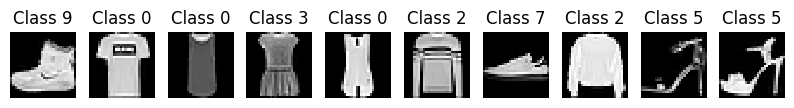

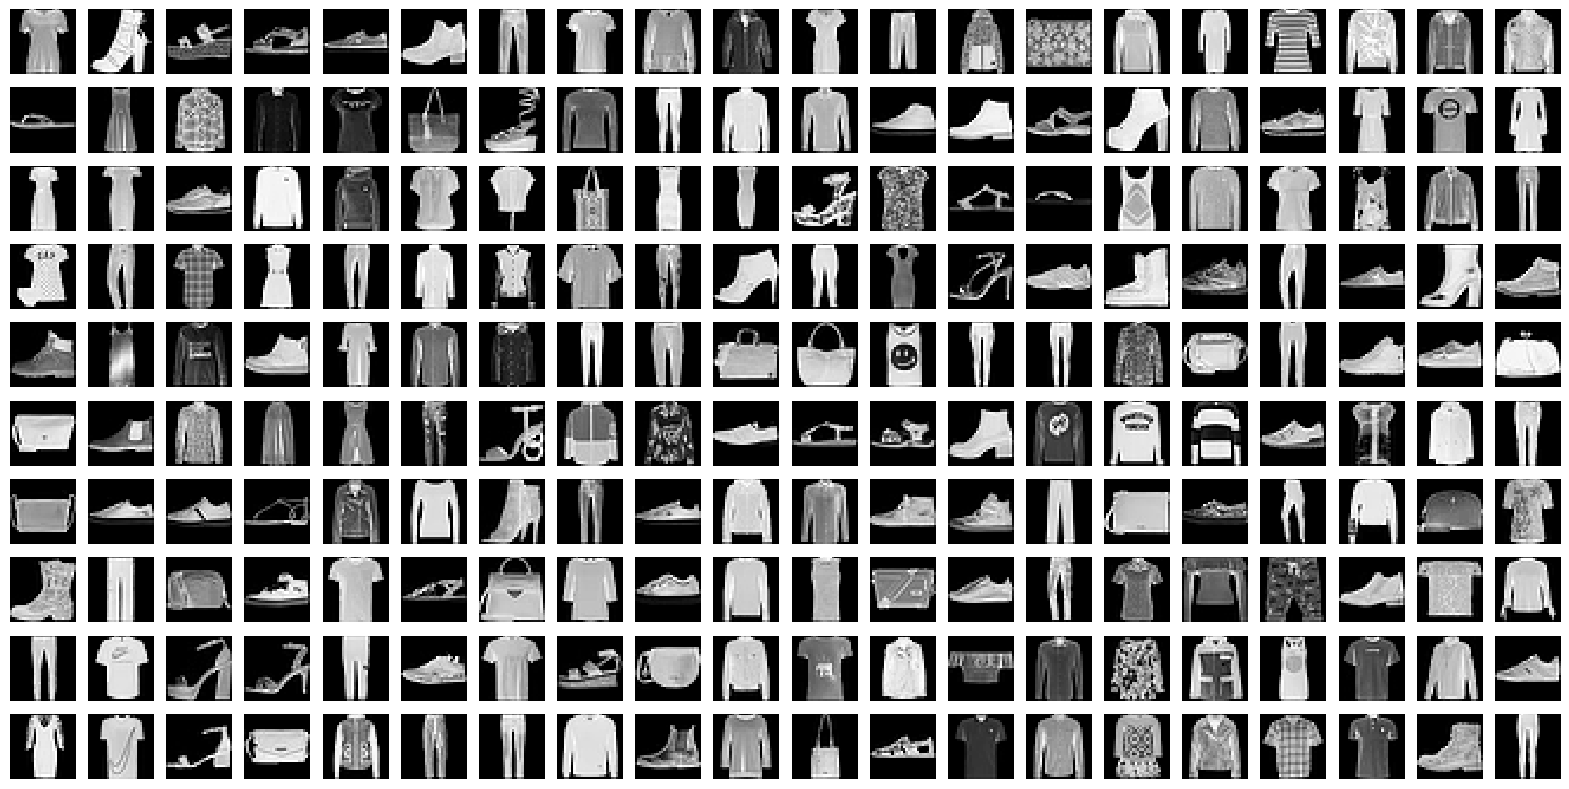

In [15]:
# Show a few sample clothes from the training set
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()

# Show a few sample clothes from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(x_train[index]) # index of the sample picture
plt.show()

In [16]:
print(f'X.shape={X.shape}')
img_rows = X.shape[1]
img_cols = X.shape[2]
num_classes = np.max(y)+1

X.shape=(70000, 28, 28)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

Create a CNN model

In [18]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

tf.random.set_seed(42)

model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
model1.add(layers.MaxPooling2D((2, 2)))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                43296     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 43706 (170.73 KB)
Trainable params: 43706 (170.73 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [19]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(0.02),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
epochs = 20
batch_size = 2048
hist = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 2s 61ms/step - loss: 1.3657 - accuracy: 0.5470 - val_loss: 0.5928 - val_accuracy: 0.7892
Epoch 2/20
23/23 [==============================] - 1s 45ms/step - loss: 0.5883 - accuracy: 0.7867 - val_loss: 0.4724 - val_accuracy: 0.8306
Epoch 3/20
23/23 [==============================] - 1s 44ms/step - loss: 0.4969 - accuracy: 0.8183 - val_loss: 0.5320 - val_accuracy: 0.8256
Epoch 4/20
23/23 [==============================] - 1s 44ms/step - loss: 0.4473 - accuracy: 0.8372 - val_loss: 0.4023 - val_accuracy: 0.8567
Epoch 5/20
23/23 [==============================] - 1s 43ms/step - loss: 0.4265 - accuracy: 0.8439 - val_loss: 0.3619 - val_accuracy: 0.8719
Epoch 6/20
23/23 [==============================] - 1s 44ms/step - loss: 0.3831 - accuracy: 0.8584 - val_loss: 0.3632 - val_accuracy: 0.8693
Epoch 7/20
23/23 [==============================] - 1s 44ms/step - loss: 0.3714 - accuracy: 0.8644 - val_loss: 0.3899 - val_accuracy: 0.8588
Epoch 8/20
23

Compute scores on the validation set

In [21]:
val_loss1, val_acc1 = model1.evaluate(X_test, y_test)
print('validation accuracy:', val_acc1)
print('validation loss:', val_loss1)

722/722 [==============================] - 2s 3ms/step - loss: 0.3770 - accuracy: 0.8708
validation accuracy: 0.8707792162895203
validation loss: 0.3770129978656769


Display the confusion matrix

The function from the previous classes was split into two functions...

In [22]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Define the confusion matrix for the results
def show_confusion_matrix(matrix, labels=None):
    num_classes = matrix.shape[0]
    if labels is None:
      labels = [str(i) for i in range(num_classes)]
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels[0:num_classes],
                yticklabels=labels[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def compute_and_show_confusion_matrix(validations, predictions, labels=None):
    matrix = metrics.confusion_matrix(validations, predictions)
    show_confusion_matrix(matrix, labels)

In [23]:
probs = model1.predict(X_test)
y_pred = np.argmax(probs,axis=1)
print(f'y_pred.shape={y_pred.shape}')

722/722 [==============================] - 2s 2ms/step
y_pred.shape=(23100,)


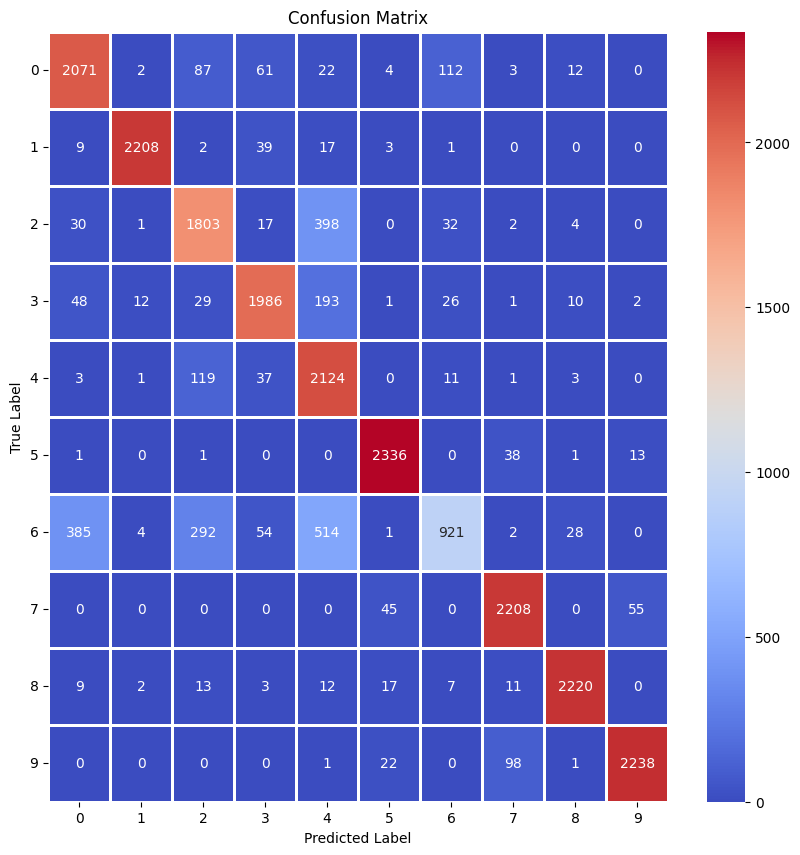

In [24]:
compute_and_show_confusion_matrix(y_test, y_pred)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2374
           1       0.99      0.97      0.98      2279
           2       0.77      0.79      0.78      2287
           3       0.90      0.86      0.88      2308
           4       0.65      0.92      0.76      2299
           5       0.96      0.98      0.97      2390
           6       0.83      0.42      0.56      2201
           7       0.93      0.96      0.95      2308
           8       0.97      0.97      0.97      2294
           9       0.97      0.95      0.96      2360

    accuracy                           0.87     23100
   macro avg       0.88      0.87      0.86     23100
weighted avg       0.88      0.87      0.87     23100



# 3.3 Wrap it as a function

Digression related to Python technicalities:

*  it is possible to define a function taking as parameter a dictionary mapping keywords to values
*  and call it specifying keywords or passing a dictionary

In [26]:
def foo(**kwargs):
  print('foo')
  for k in kwargs:
    print(k,kwargs[k])

foo(ala=0,ma=1,kota=2)


foo
ala 0
ma 1
kota 2


In [27]:
def boo(**kwargs):
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',111)
  kota = kwargs.get('kota',222)
  print('boo',ala,ma,kota)

boo(ala=23)

boo(**{'ala':123,'ma':12})

boo 23 111 222
boo 123 12 222


It is up to you what to do with unknown keywords

In [28]:
def woo(**kwargs):
  keywords = ['ala','ma','kota']
  for k in kwargs:
    if k not in keywords:
      raise ValueError(f'Unknown keyword {k}')
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',1)
  kota = kwargs.get('kota',2)
  print('woo',ala,ma,kota)

woo(**{'ala':-1})
try:
  woo(**{'ala':-1,'ola':-2})
except Exception as e:
  print(e)

woo -1 1 2
Unknown keyword ola


## Define a function building a CNN model

**TODO 3.3.1** define at least two other models  and name it using keywords, e.g 'model_1', 'model_2', etc

In [78]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

def build_model(model_name,input_shape,num_classes,random_state=42):
  tf.random.set_seed(random_state)
  if model_name == 'model_0':
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'model_1':
    model_1 = models.Sequential()
    model_1.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model_1.add(layers.Conv2D(8, (5, 5), activation='relu', input_shape=input_shape))
    model_1.add(layers.MaxPooling2D((2, 2)))
    model_1.add(layers.Flatten())
    model_1.add(layers.Dense(32, activation='relu'))
    model_1.add(layers.Dense(num_classes, activation='softmax'))
    return model_1
  elif model_name == 'model_2':
    model_2 = models.Sequential()
    model_2.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
    model_2.add(layers.MaxPooling2D((2, 2)))
    model_2.add(layers.Flatten())
    model_2.add(layers.Dense(32, activation='relu'))
    model_2.add(layers.Dense(num_classes, activation='softmax'))
    return model_2
  elif model_name == 'model_3':
    model_3 = models.Sequential()
    model_3.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=input_shape))
    model_3.add(layers.MaxPooling2D((2, 2)))
    model_3.add(layers.Flatten())
    model_3.add(layers.Dense(32, activation='relu'))
    model_3.add(layers.Dense(num_classes, activation='softmax'))
    return model_3
  elif model_name == 'model_4':
    model_4 = models.Sequential()
    model_4.add(layers.Conv2D(8, (3, 3), activation='mish', input_shape=input_shape))
    model_4.add(layers.MaxPooling2D((2, 2)))
    model_4.add(layers.Flatten())
    model_4.add(layers.Dense(32, activation='mish'))
    model_4.add(layers.Dense(num_classes, activation='softmax'))
    return model_4
  elif model_name == 'model_5':
    model_5 = models.Sequential()
    model_5.add(layers.Conv2D(8, (3, 3), activation='gelu', input_shape=input_shape))
    model_5.add(layers.MaxPooling2D((2, 2)))
    model_5.add(layers.Flatten())
    model_5.add(layers.Dense(32, activation='gelu'))
    model_5.add(layers.Dense(num_classes, activation='softmax'))
    return model_5
  elif model_name == 'model_6':
    model_6 = models.Sequential()
    model_6.add(layers.Conv2D(16, (3, 3), activation='elu', input_shape=input_shape))
    model_6.add(layers.MaxPooling2D((2, 2)))
    model_6.add(layers.Conv2D(8, (3, 3), activation='gelu', input_shape=input_shape))
    model_6.add(layers.MaxPooling2D((2, 2)))
    model_6.add(layers.Flatten())
    model_6.add(layers.Dense(32, activation='relu'))
    model_6.add(layers.Dense(num_classes, activation='softmax'))
    return model_6

## The function that trains a model, tests it and return scores

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def perform_test(X_train,y_train,X_test,y_test,**kwargs):
  model_name = kwargs['model_name']
  epochs = kwargs.get('epochs',20)
  learning_rate = kwargs.get('learning_rate',0.01)
  batch_size = kwargs.get('batch_size',1024)
  random_seed = kwargs.get('random_seed',42)
  returnModel = kwargs.get('returnModel',True)

  input_shape = list(X_train.shape[1:])
  input_shape.append(1)
  input_shape=tuple(input_shape)

  num_classes = np.max(y_train)+1
  model = build_model(model_name,input_shape=input_shape,num_classes=num_classes,random_state=random_seed)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)
  preds = model.predict(X_test)
  y_pred = np.argmax(preds,axis=1)
  print(f'y_pred {y_pred.shape} {y_test.shape}')
  results = {}
  results['confusion_matrix'] = confusion_matrix(y_pred,y_test)
  results['accuracy'] = accuracy_score(y_pred,y_test)
  results['precision'] = precision_score(y_pred,y_test,average='macro')
  results['recall'] = recall_score(y_pred,y_test,average='macro')
  results['f1'] = f1_score(y_pred,y_test,average='macro')
  if returnModel:
    results['model'] = model
  return results


## Configurations
We will define a number of configurations to be tested, Each configuration defines the model name and a number of hyperparameters.


In [80]:
configurations={'First configuration':{'model_name':'model_0','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Second configuration':{'model_name':'model_1','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Third configuration':{'model_name':'model_2','epochs':20,'learning_rate':0.01,'random_seed':42},
                '4-th configuration':{'model_name':'model_3','epochs':20,'learning_rate':0.01,'random_seed':42},
                '5-th configuration':{'model_name':'model_4','epochs':20,'learning_rate':0.01,'random_seed':42},
                '6-th configuration':{'model_name':'model_5','epochs':20,'learning_rate':0.01,'random_seed':42},
                '7-th configuration':{'model_name':'model_6','epochs':20,'learning_rate':0.01,'random_seed':42}
}



**TODO 3.3.2** Call the function perform_test for each configuration, print returned score values and display confusion matrix.

Epoch 1/20
59/59 [==============================] - 1s 15ms/step - loss: 56.9148 - accuracy: 0.5887
Epoch 2/20
59/59 [==============================] - 1s 15ms/step - loss: 0.9196 - accuracy: 0.6891
Epoch 3/20
59/59 [==============================] - 1s 15ms/step - loss: 0.6467 - accuracy: 0.7560
Epoch 4/20
59/59 [==============================] - 1s 15ms/step - loss: 0.4588 - accuracy: 0.8279
Epoch 5/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3879 - accuracy: 0.8540
Epoch 6/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3541 - accuracy: 0.8654
Epoch 7/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3371 - accuracy: 0.8723
Epoch 8/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3239 - accuracy: 0.8781
Epoch 9/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3020 - accuracy: 0.8845
Epoch 10/20
59/59 [==============================] - 1s 15ms/step - loss: 0.2915 - accuracy: 0.8894
Epoch 11

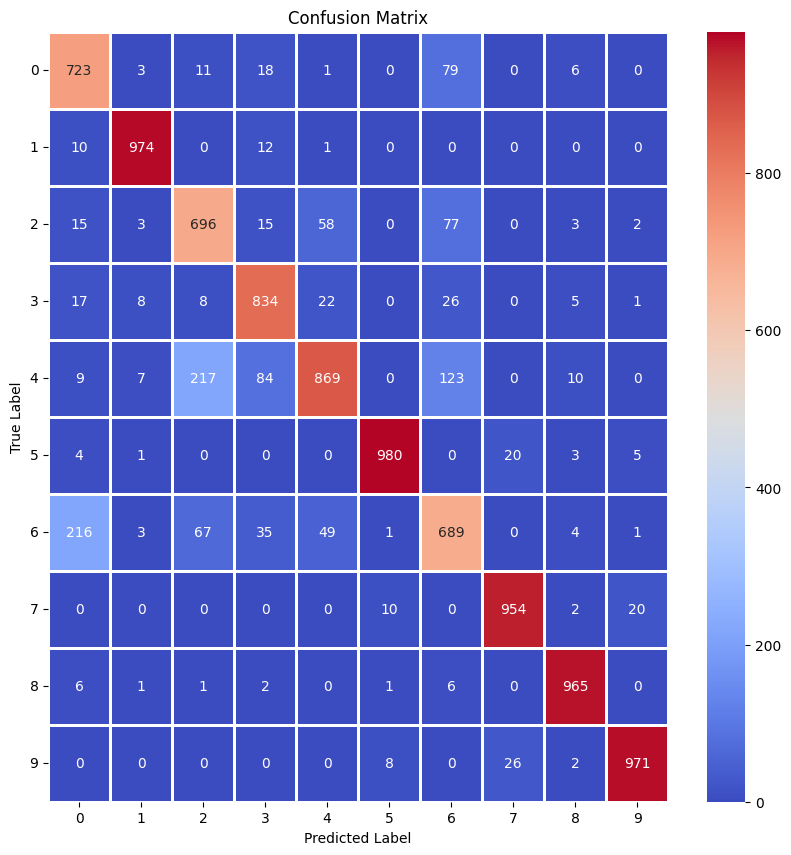

Accuracy:	0.866
Precision:	0.865
Recall:	0.873
F1:	0.867
Epoch 1/20
59/59 [==============================] - 3s 43ms/step - loss: 9.6970 - accuracy: 0.6280
Epoch 2/20
59/59 [==============================] - 3s 43ms/step - loss: 0.6165 - accuracy: 0.7776
Epoch 3/20
59/59 [==============================] - 2s 42ms/step - loss: 0.5224 - accuracy: 0.8071
Epoch 4/20
59/59 [==============================] - 2s 41ms/step - loss: 0.4681 - accuracy: 0.8250
Epoch 5/20
59/59 [==============================] - 2s 41ms/step - loss: 0.4198 - accuracy: 0.8447
Epoch 6/20
59/59 [==============================] - 2s 41ms/step - loss: 0.3752 - accuracy: 0.8610
Epoch 7/20
59/59 [==============================] - 2s 42ms/step - loss: 0.3447 - accuracy: 0.8719
Epoch 8/20
59/59 [==============================] - 2s 41ms/step - loss: 0.3188 - accuracy: 0.8799
Epoch 9/20
59/59 [==============================] - 2s 41ms/step - loss: 0.3001 - accuracy: 0.8858
Epoch 10/20
59/59 [==============================] -

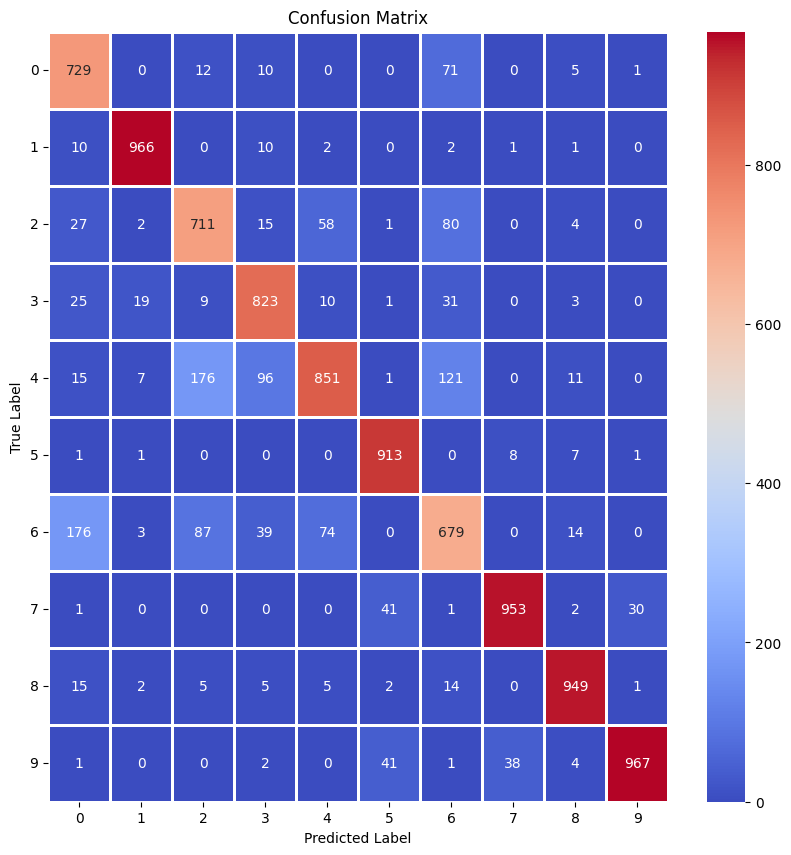

Accuracy:	0.854
Precision:	0.854
Recall:	0.861
F1:	0.855
Epoch 1/20
59/59 [==============================] - 1s 13ms/step - loss: 23.0300 - accuracy: 0.4851
Epoch 2/20
59/59 [==============================] - 1s 13ms/step - loss: 0.9507 - accuracy: 0.6975
Epoch 3/20
59/59 [==============================] - 1s 13ms/step - loss: 0.6748 - accuracy: 0.7911
Epoch 4/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4894 - accuracy: 0.8227
Epoch 5/20
59/59 [==============================] - 1s 13ms/step - loss: 0.4427 - accuracy: 0.8351
Epoch 6/20
59/59 [==============================] - 1s 13ms/step - loss: 0.4115 - accuracy: 0.8453
Epoch 7/20
59/59 [==============================] - 1s 13ms/step - loss: 0.3923 - accuracy: 0.8522
Epoch 8/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3777 - accuracy: 0.8573
Epoch 9/20
59/59 [==============================] - 1s 13ms/step - loss: 0.3720 - accuracy: 0.8602
Epoch 10/20
59/59 [==============================] 

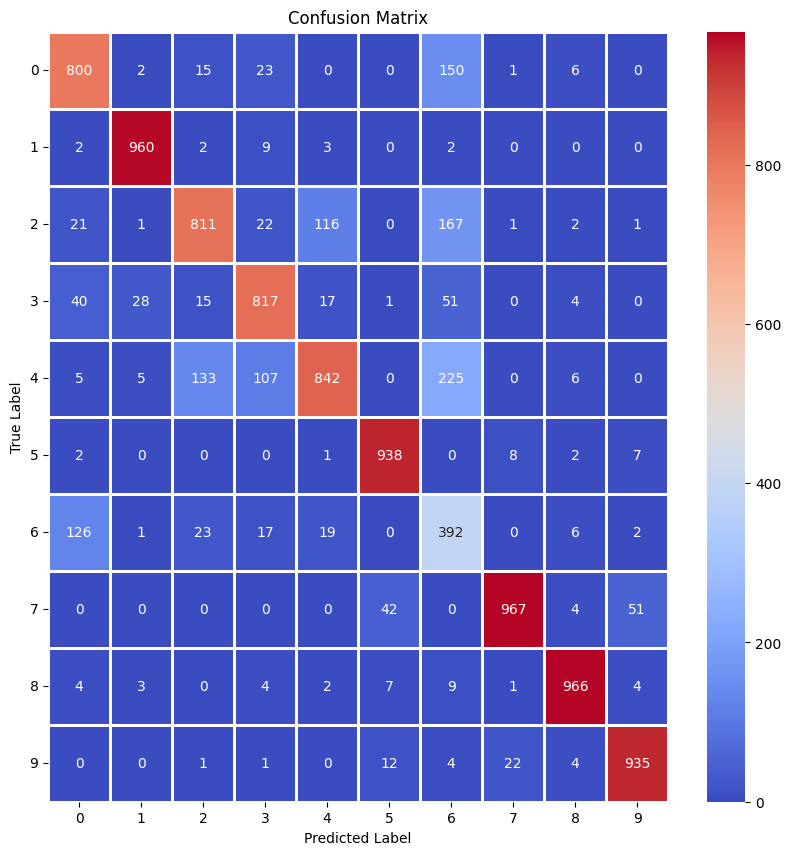

Accuracy:	0.843
Precision:	0.843
Recall:	0.845
F1:	0.838
Epoch 1/20
59/59 [==============================] - 2s 28ms/step - loss: 17.9245 - accuracy: 0.6917
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.5772 - accuracy: 0.7998
Epoch 3/20
59/59 [==============================] - 2s 27ms/step - loss: 0.5257 - accuracy: 0.8122
Epoch 4/20
59/59 [==============================] - 2s 27ms/step - loss: 0.4715 - accuracy: 0.8277
Epoch 5/20
59/59 [==============================] - 2s 28ms/step - loss: 0.4316 - accuracy: 0.8397
Epoch 6/20
59/59 [==============================] - 2s 26ms/step - loss: 0.4012 - accuracy: 0.8528
Epoch 7/20
59/59 [==============================] - 2s 26ms/step - loss: 0.3780 - accuracy: 0.8617
Epoch 8/20
59/59 [==============================] - 2s 27ms/step - loss: 0.3614 - accuracy: 0.8658
Epoch 9/20
59/59 [==============================] - 2s 27ms/step - loss: 0.3463 - accuracy: 0.8707
Epoch 10/20
59/59 [==============================] 

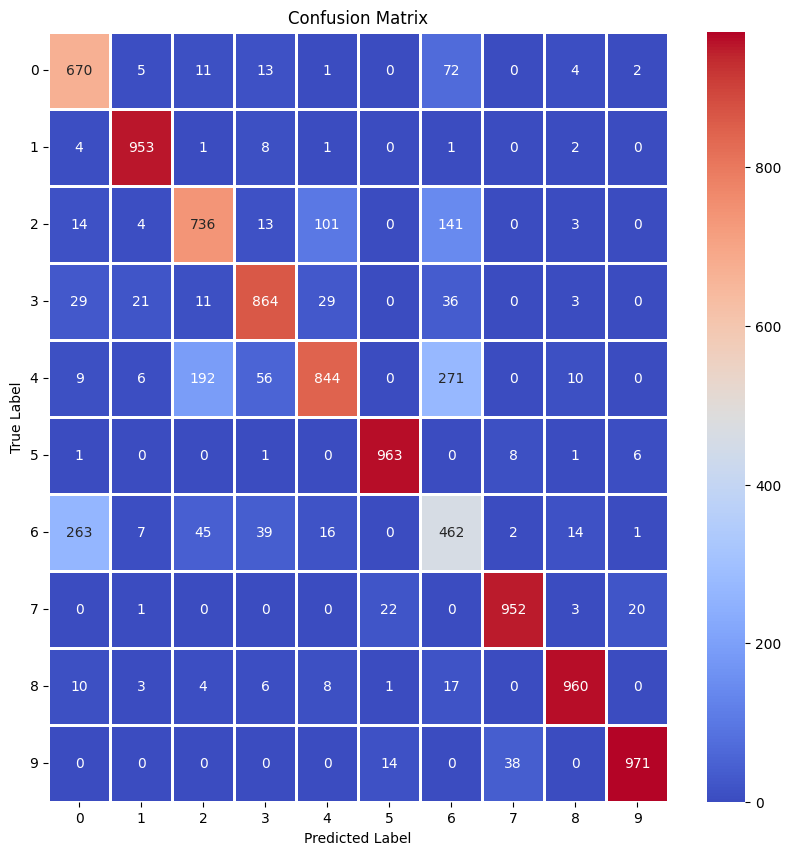

Accuracy:	0.838
Precision:	0.838
Recall:	0.843
F1:	0.837
Epoch 1/20
59/59 [==============================] - 2s 22ms/step - loss: 30.6488 - accuracy: 0.5981
Epoch 2/20
59/59 [==============================] - 1s 22ms/step - loss: 0.6550 - accuracy: 0.7983
Epoch 3/20
59/59 [==============================] - 1s 22ms/step - loss: 0.4671 - accuracy: 0.8314
Epoch 4/20
59/59 [==============================] - 1s 23ms/step - loss: 0.4054 - accuracy: 0.8510
Epoch 5/20
59/59 [==============================] - 1s 22ms/step - loss: 0.3729 - accuracy: 0.8602
Epoch 6/20
59/59 [==============================] - 1s 23ms/step - loss: 0.3461 - accuracy: 0.8707
Epoch 7/20
59/59 [==============================] - 1s 23ms/step - loss: 0.3427 - accuracy: 0.8715
Epoch 8/20
59/59 [==============================] - 1s 23ms/step - loss: 0.3228 - accuracy: 0.8788
Epoch 9/20
59/59 [==============================] - 1s 22ms/step - loss: 0.3163 - accuracy: 0.8806
Epoch 10/20
59/59 [==============================] 

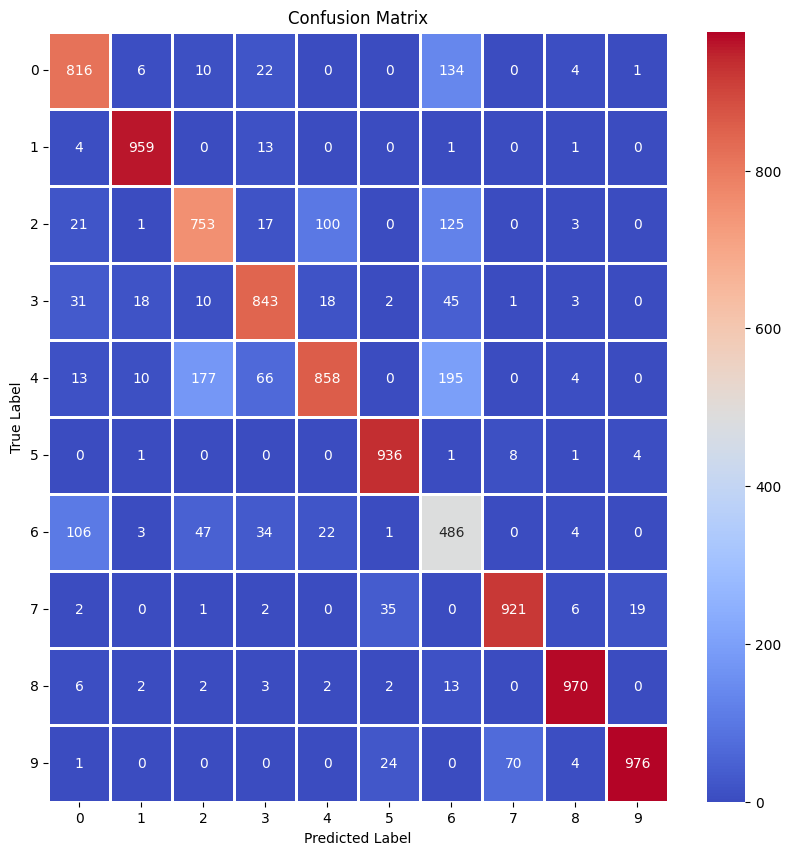

Accuracy:	0.852
Precision:	0.852
Recall:	0.854
F1:	0.85
Epoch 1/20
59/59 [==============================] - 2s 24ms/step - loss: 6.0646 - accuracy: 0.6977
Epoch 2/20
59/59 [==============================] - 1s 24ms/step - loss: 0.5151 - accuracy: 0.8179
Epoch 3/20
59/59 [==============================] - 1s 24ms/step - loss: 0.4212 - accuracy: 0.8453
Epoch 4/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3682 - accuracy: 0.8621
Epoch 5/20
59/59 [==============================] - 1s 25ms/step - loss: 0.3427 - accuracy: 0.8713
Epoch 6/20
59/59 [==============================] - 1s 24ms/step - loss: 0.3194 - accuracy: 0.8791
Epoch 7/20
59/59 [==============================] - 2s 26ms/step - loss: 0.3024 - accuracy: 0.8872
Epoch 8/20
59/59 [==============================] - 1s 25ms/step - loss: 0.2964 - accuracy: 0.8892
Epoch 9/20
59/59 [==============================] - 1s 24ms/step - loss: 0.2817 - accuracy: 0.8919
Epoch 10/20
59/59 [==============================] - 

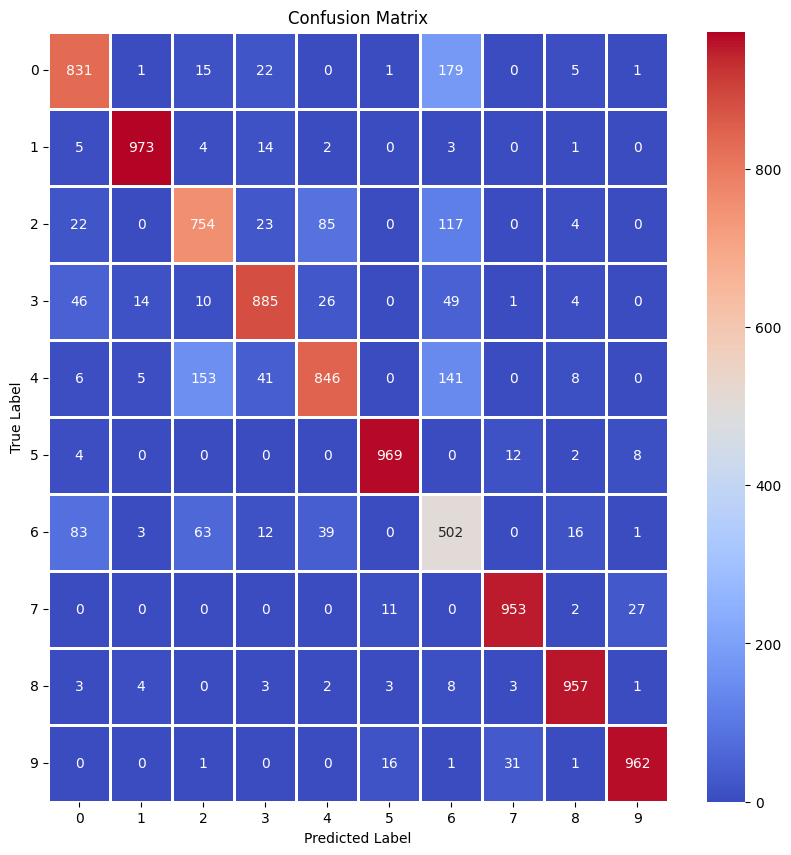

Accuracy:	0.863
Precision:	0.863
Recall:	0.862
F1:	0.86
Epoch 1/20
59/59 [==============================] - 3s 40ms/step - loss: 2.5552 - accuracy: 0.5428
Epoch 2/20
59/59 [==============================] - 2s 40ms/step - loss: 0.7564 - accuracy: 0.7219
Epoch 3/20
59/59 [==============================] - 2s 39ms/step - loss: 0.5766 - accuracy: 0.7856
Epoch 4/20
59/59 [==============================] - 2s 40ms/step - loss: 0.5110 - accuracy: 0.8121
Epoch 5/20
59/59 [==============================] - 2s 39ms/step - loss: 0.4638 - accuracy: 0.8262
Epoch 6/20
59/59 [==============================] - 2s 38ms/step - loss: 0.4954 - accuracy: 0.8297
Epoch 7/20
59/59 [==============================] - 2s 37ms/step - loss: 0.4318 - accuracy: 0.8385
Epoch 8/20
59/59 [==============================] - 2s 39ms/step - loss: 0.4144 - accuracy: 0.8430
Epoch 9/20
59/59 [==============================] - 2s 38ms/step - loss: 0.3993 - accuracy: 0.8487
Epoch 10/20
59/59 [==============================] - 

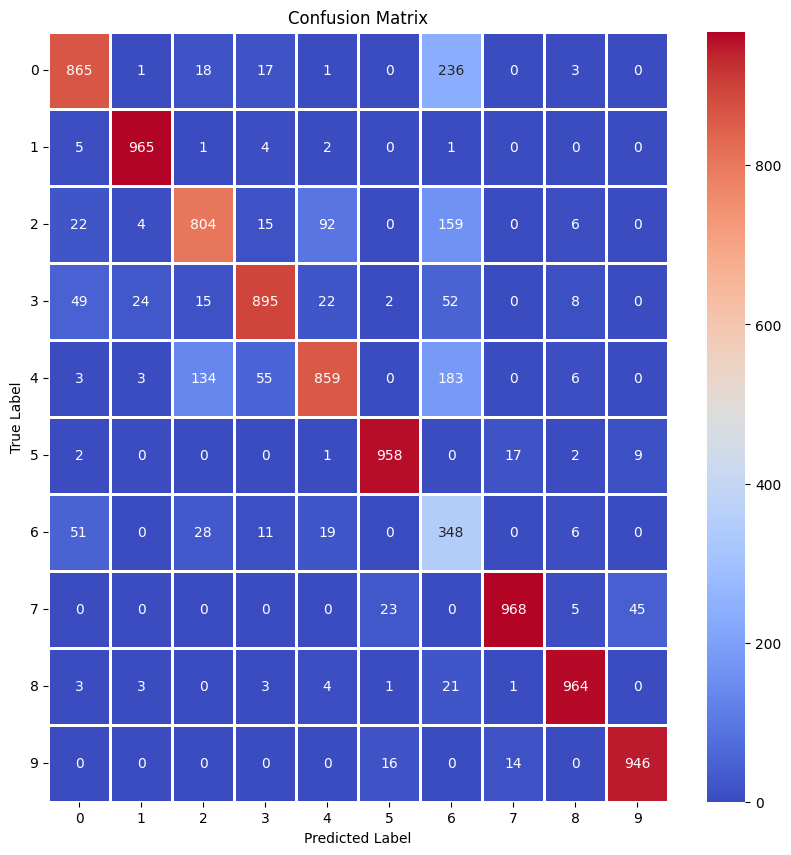

Accuracy:	0.857
Precision:	0.857
Recall:	0.859
F1:	0.849


In [81]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

for cname in configurations:
  results = perform_test(x_train, y_train, x_test, y_test, **configurations[cname])
  print(f'--- {cname} ---')
  # show results
  show_confusion_matrix(results['confusion_matrix'])
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')

**TODO 3.3.3** Prepare 7 (**seven**) configurations adding **at least** two new NN models and perform tests. Try to outperform the results obtained with the sample code.  

Present the results in the form of a table. A table can be entered as a markdown: [see the table generator](https://www.tablesgenerator.com/markdown_tables#). As an alternative, you may load data to Pandas DataFrame and display using df.head().

| Configuration         | Model name   | Hiperparameters                   | Accuracy | Precision | Recall | F1   |
|----------------------|---------|----------------------------------|----------|-----------|--------|------|
| First Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.866     | 0.865      | 0.873   | 0.867 |
| Second Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.854     | 0.854      | 0.861   | 0.855 |
| Third Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.843     | 0.843      | 0.845   | 0.838 |
| 4-th Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.838     | 0.838      | 0.843   | 0.837 |
| 5-th Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.852     | 0.852      | 0.854   | 0.85 |
| 6-th Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.863     | 0.863      | 0.862   | 0.86 |
| 7-th Configuration  | model_0 | epochs=20 learning_rate=0.01 | 0.857     | 0.857      | 0.859   | 0.849 |

Hiperparameters can be placed in seperate columns...

# 3.4 Cross validation



In [33]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

We define a code that uses StratifiedKFold class to perform k-fold cross validation. Stratified - means preserving proportions of strata, i.e. class labels.

The cross validation will be performed only on the training set. Then the model will be tested on the training set

## Cross validation

In [38]:
from sklearn.model_selection import StratifiedKFold, train_test_split

n_splits = 7
random_state =  123
config = configurations['First configuration']

cv_results = {}

skf = StratifiedKFold(n_splits=n_splits, shuffle=True,random_state=random_state)
for fold_number, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  X_train_fold = X_train[train_index]
  y_train_fold = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  print(f'============= Fold#{fold_number+1} =============')
  results = perform_test(X_train_fold,y_train_fold,X_test_fold,y_test_fold,**config)

  for k in results:
    if k=='model':
      continue
    rlist=cv_results.get(k,[])
    rlist.append(results[k])
    cv_results[k]=rlist


============= Fold#1 =============
Epoch 1/20
51/51 [==============================] - 1s 16ms/step - loss: 16.0058 - accuracy: 0.6250
Epoch 2/20
51/51 [==============================] - 1s 17ms/step - loss: 0.6083 - accuracy: 0.7971
Epoch 3/20
51/51 [==============================] - 1s 17ms/step - loss: 0.4879 - accuracy: 0.8265
Epoch 4/20
51/51 [==============================] - 1s 18ms/step - loss: 0.4132 - accuracy: 0.8491
Epoch 5/20
51/51 [==============================] - 1s 18ms/step - loss: 0.3845 - accuracy: 0.8604
Epoch 6/20
51/51 [==============================] - 1s 18ms/step - loss: 0.3628 - accuracy: 0.8668
Epoch 7/20
51/51 [==============================] - 1s 18ms/step - loss: 0.3409 - accuracy: 0.8745
Epoch 8/20
51/51 [==============================] - 1s 18ms/step - loss: 0.3274 - accuracy: 0.8793
Epoch 9/20
51/51 [==============================] - 1s 17ms/step - loss: 0.3153 - accuracy: 0.8829
Epoch 10/20
51/51 [==============================] - 1s 19ms/step - loss:

**TODO 3.4.1** Process the data from cv_results to display average scores and aggregated confussion matrix. In the provided code sample pandas DataFrame is used, however, it can be achieved in many other ways, e.g. by converting lists to numpy arrays.

In [42]:
# display results
import pandas as pd

df = pd.DataFrame(cv_results)
df.head()

confusion_matrix  accuracy  precision  \
0  [[692, 3, 22, 34, 3, 3, 113, 0, 1, 0], [6, 843...  0.862343   0.862354   
1  [[639, 2, 13, 21, 0, 1, 94, 0, 0, 0], [0, 831,...  0.852310   0.852337   
2  [[600, 2, 6, 14, 2, 0, 73, 0, 0, 0], [4, 830, ...  0.851143   0.851128   
3  [[647, 2, 11, 20, 0, 1, 70, 0, 4, 0], [5, 823,...  0.861860   0.861863   
4  [[573, 7, 4, 30, 3, 1, 54, 1, 7, 0], [2, 839, ...  0.840275   0.840263   

     recall        f1  
0  0.861533  0.861775  
1  0.868748  0.855405  
2  0.860941  0.851147  
3  0.865732  0.862450  
4  0.862154  0.843478

In [43]:
# Compute avarage scores
print(f'Accuracy:\t{np.mean(df["accuracy"][:]):.3}')
print(f'Precision:\t{np.mean(df["precision"][:]):.3}')
print(f'Recall:\t{np.mean(df["recall"][:]):.3}')
print(f'F1:\t{np.mean(df["f1"][:]):.3}')

Accuracy:	0.854
Precision:	0.854
Recall:	0.863
F1:	0.854


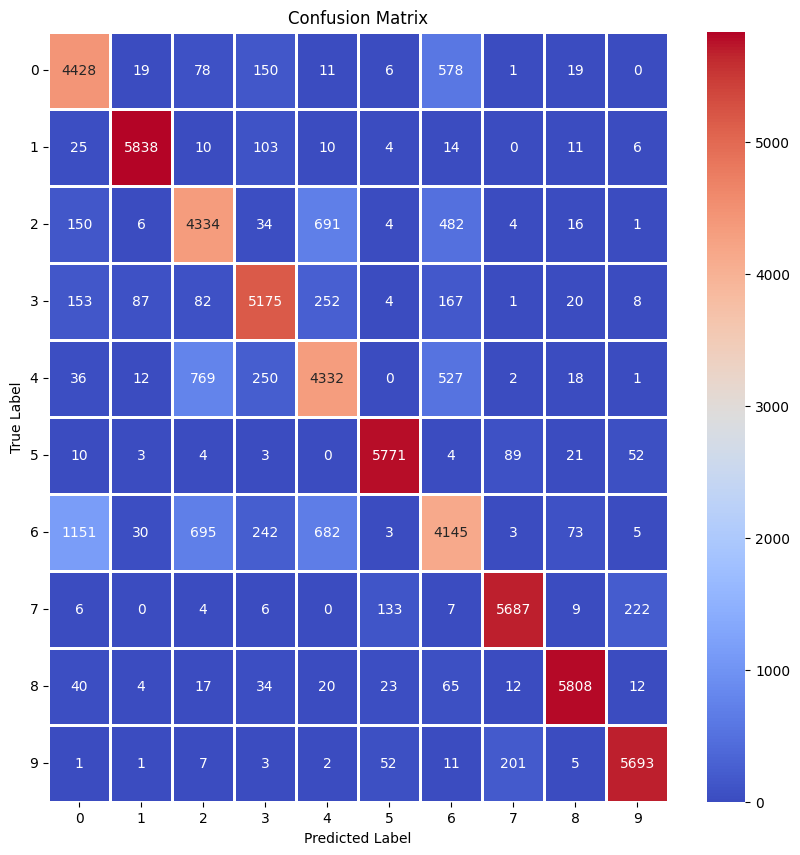

In [50]:
# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(df["confusion_matrix"][:])
show_confusion_matrix(cm)

**TODO 3.4.2** Perform the above experiments using **three** best configurations (based on train-test procedure. Compare results obtained by testing and cross-validation.

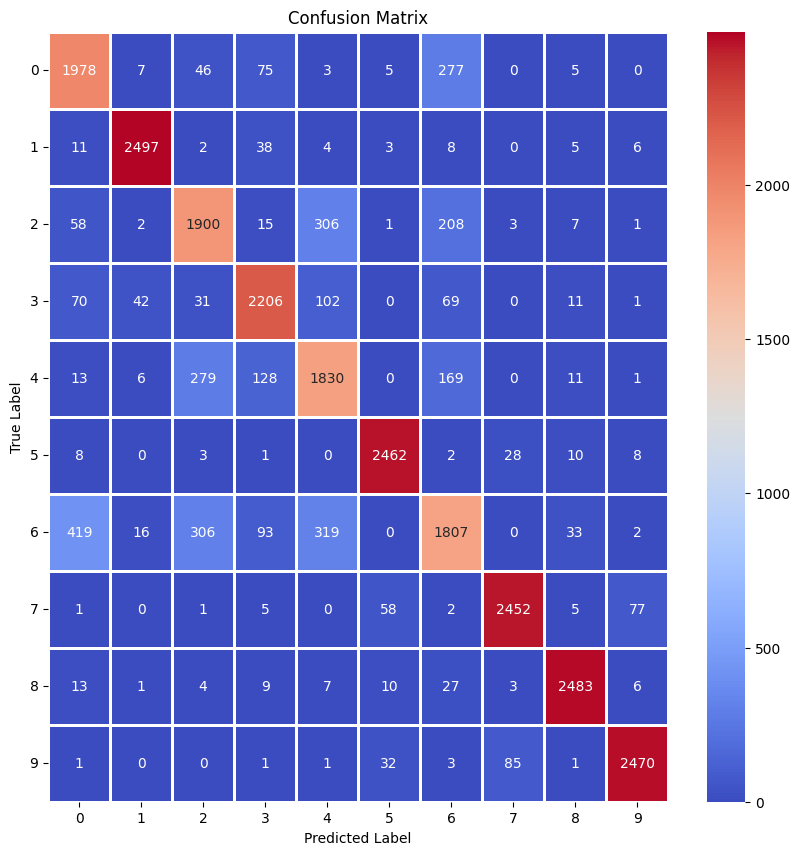

In [54]:
# Aggregate (i.e. sum) confusion matrices for particular folds and display it
cm = sum(df["confusion_matrix"][:2],df["confusion_matrix"][3])
show_confusion_matrix(cm)

## Testing the winning model

**TODO 3.4.3** Build a model using the winnining configuration (according to CV) and perform the final test on the delivered test set (X_test,y_test).





In [57]:
# test based on training data
config={'First configuration':{'model_name':'model_0','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Second configuration':{'model_name':'model_1','epochs':20,'learning_rate':0.01,'random_seed':42},
                'Third configuration':{'model_name':'model_2','epochs':20,'learning_rate':0.01,'random_seed':42},
                '4-th configuration':{'model_name':'model_3','epochs':20,'learning_rate':0.01,'random_seed':42},
                '5-th configuration':{'model_name':'model_4','epochs':20,'learning_rate':0.01,'random_seed':42},
                '6-th configuration':{'model_name':'model_5','epochs':20,'learning_rate':0.01,'random_seed':42},
                '7-th configuration':{'model_name':'model_6','epochs':20,'learning_rate':0.01,'random_seed':42}
}
results = perform_test(x_train, y_train, x_test, y_test, **config['Third configuration'])

Epoch 1/20
59/59 [==============================] - 1s 14ms/step - loss: 2.2951 - accuracy: 0.7091
Epoch 2/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4818 - accuracy: 0.8282
Epoch 3/20
59/59 [==============================] - 1s 14ms/step - loss: 0.4154 - accuracy: 0.8499
Epoch 4/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3862 - accuracy: 0.8589
Epoch 5/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3587 - accuracy: 0.8691
Epoch 6/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3500 - accuracy: 0.8690
Epoch 7/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3388 - accuracy: 0.8739
Epoch 8/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3248 - accuracy: 0.8789
Epoch 9/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3212 - accuracy: 0.8808
Epoch 10/20
59/59 [==============================] - 1s 14ms/step - loss: 0.3135 - accuracy: 0.8817
Epoch 11/

Print results

In [59]:
for k in results:
  if k == 'confusion_matrix' or k=='model':
    continue
  print(f'{k}: ', results[k])

accuracy:  0.8488
precision:  0.8488
recall:  0.8552896119884863
f1:  0.8477306387418985


Display the confusion matrix

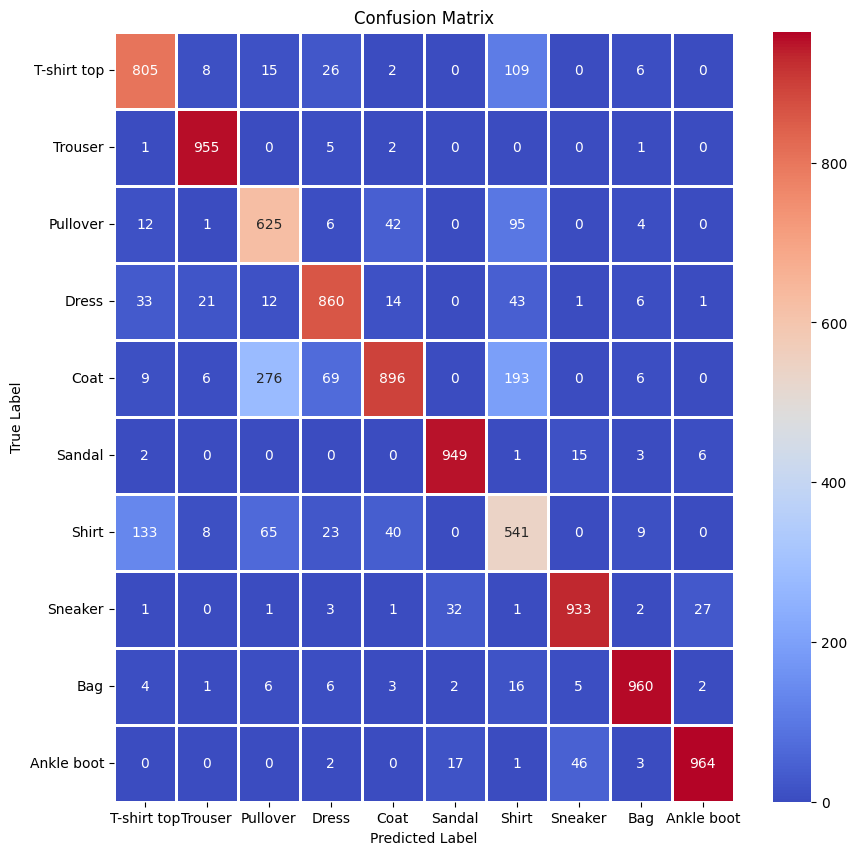

In [60]:
labels = ['T-shirt top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_confusion_matrix(results['confusion_matrix'], labels)

# 3.5 Cifar dataset

We will process Cifar dataset using a resource demanding CNN model.  

In [61]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [62]:
print(X_train.shape)

(50000, 32, 32, 3)


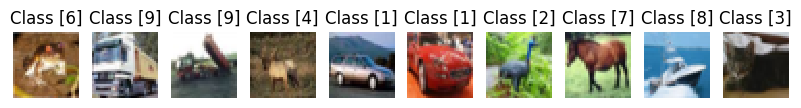

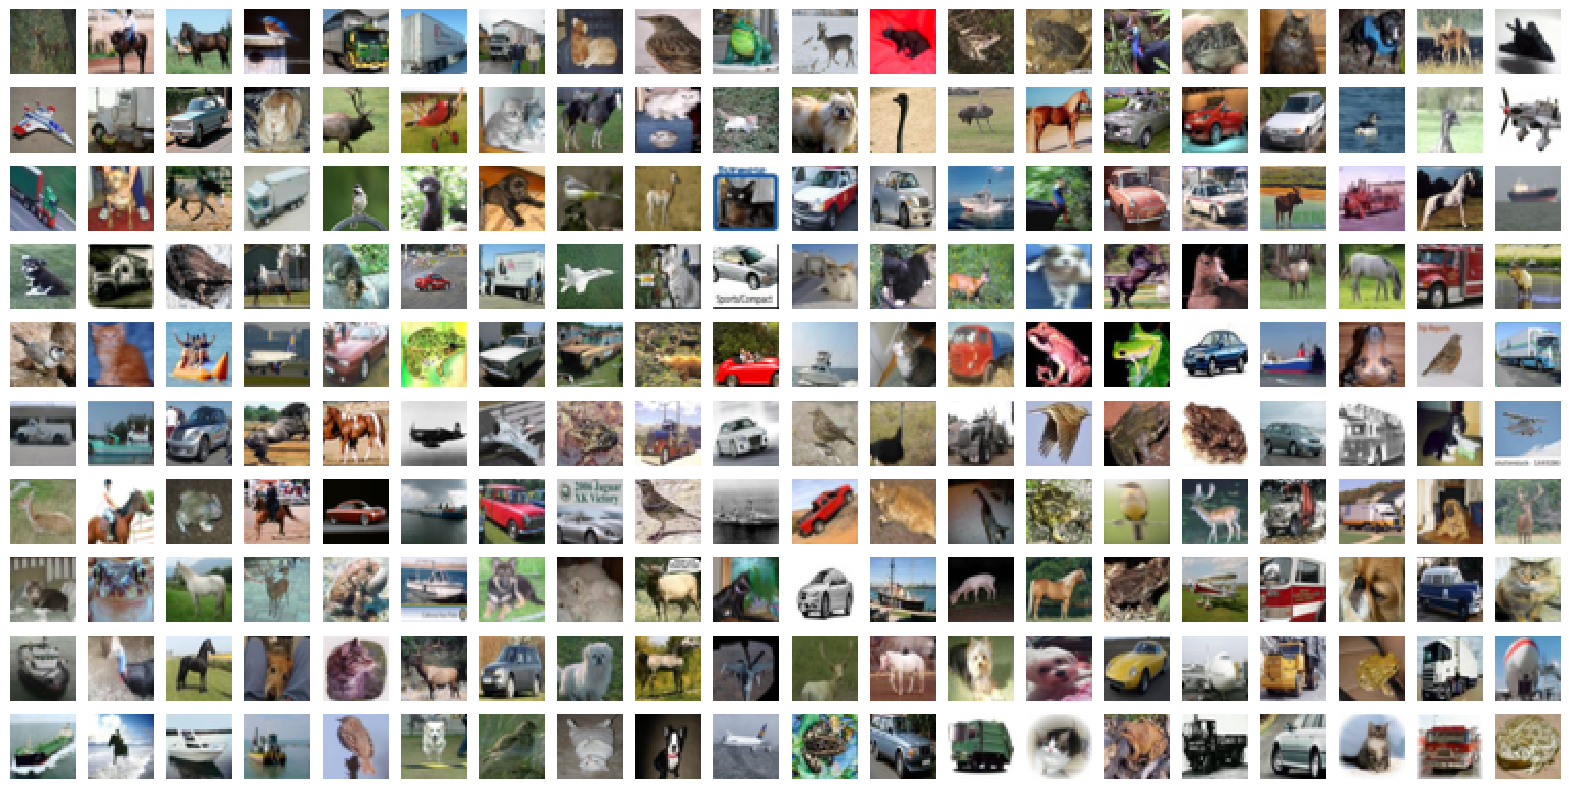

In [63]:
# Show a few sample images from the training set
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (2.5, 2.5) # set default size of plots
col1 = 10
row1 = 1
fig = plt.figure(figsize=(col1, row1))
for index in range(0, col1*row1):
    fig.add_subplot(row1, col1, index + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
    plt.title("Class " + str(y_train[index]))
plt.show()

# Show a few sample digits from the training set
plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
col2 = 20
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col1*row1, col1*row1 + col2*row2):
    fig.add_subplot(row2, col2, index - col1*row1 + 1)
    plt.axis('off')
    plt.imshow(X_train[index]) # index of the sample picture
plt.show()

Some basic preprocessing and calculation of the input shape

In [64]:
X_train = X_train.astype('float32')   # Copy this array and cast it to a specified type
X_test = X_test.astype('float32')     # Copy this array and cast it to a specified type
X_train /= 255 # Transfrom the training data from the range of 0 and 255 to the range of 0 and 1
X_test /= 255  # Transfrom the validating data from the range of 0 and 255 to the range of 0 and 1
input_shape = X_train.shape[1:]
print(f'input shape={input_shape}')

input shape=(32, 32, 3)


Definition of CNN model

In [65]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers


num_classes = y_train.max()+1

# Define the sequential Keras model composed of a few layers
model3 = Sequential()   # establishes the type of the network model
# Conv2D - creates a convolutional layer (https://keras.io/layers/convolutional/#conv2d) with
# filters - specified number of convolutional filters
# kernel_size - defines the frame (sliding window) size where the convolutional filter is implemented
# activation - sets the activation function for this layers, here ReLU
# input_shape - defines the shape of the input matrix (vector), here input_shape = (1, img_rows, img_cols)
model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D pools the max value from the frame (sliding window) of 2 x 2 size
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25)) # Implements the drop out with the probability of 0.25
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
#model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))
# Finish the convolutional model and flatten the layer which does not affect the batch size.
model3.add(Flatten())
# Use a dense layer (MLP) consisting of 256 neurons with relu activation functions
model3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dropout(0.3))
model3.add(Dense(num_classes, activation='softmax'))

# Now print the full model and notice the number of all trainable paramters
print(model3.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                               

As the number of parameters is high, training the model requires a few dozen of epochs. As an epoch may last as long as 160 sec, the training  phase may last over 2 hours

To accelerate a bit and make the whole process reliable:
*  We will train a model on a subsample of the training set and we will check scores
*  Then we will train using the full training set, in a few increments
*  Models will be saved to be restored in the case of the seession crach

## Subsampling
We will use only 10% of data for training

In [66]:
import numpy as np

probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.1]
y_train_sample =y_train[probs<0.1]

print(X_train_sample.shape)

(5031, 32, 32, 3)


## Model preparation

In [67]:
# from tensorflow import keras
from keras import optimizers
# dir(optimizers)
optimizer = optimizers.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [68]:
import os
os.mkdir('models')

## Training

In [69]:
batch_size = 512
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//10,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

--- Increment 0 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 4s 312ms/step - loss: 3.3713 - accuracy: 0.1075
Epoch 2/5
10/10 [==============================] - 3s 308ms/step - loss: 3.0368 - accuracy: 0.1348
Epoch 3/5
10/10 [==============================] - 3s 312ms/step - loss: 2.7702 - accuracy: 0.1996
Epoch 4/5
10/10 [==============================] - 3s 309ms/step - loss: 2.5730 - accuracy: 0.2270
Epoch 5/5
10/10 [==============================] - 3s 313ms/step - loss: 2.3645 - accuracy: 0.2421
--- Increment 1 on a subsampled dataset ---


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
10/10 [==============================] - 3s 310ms/step - loss: 2.1961 - accuracy: 0.2671
Epoch 2/5
10/10 [==============================] - 3s 309ms/step - loss: 2.0759 - accuracy: 0.2936
Epoch 3/5
10/10 [==============================] - 3s 308ms/step - loss: 1.9919 - accuracy: 0.3101
Epoch 4/5
10/10 [==============================] - 3s 314ms/step - loss: 1.9313 - accuracy: 0.3349
Epoch 5/5
10/10 [==============================] - 3s 314ms/step - loss: 1.8756 - accuracy: 0.3602
--- Increment 2 on a subsampled dataset ---
Epoch 1/5
10/10 [==============================] - 3s 309ms/step - loss: 1.7899 - accuracy: 0.3872
Epoch 2/5
10/10 [==============================] - 3s 309ms/step - loss: 1.7586 - accuracy: 0.4029
Epoch 3/5
10/10 [==============================] - 3s 308ms/step - loss: 1.7067 - accuracy: 0.4168
Epoch 4/5
10/10 [==============================] - 3s 311ms/step - loss: 1.6664 - accuracy: 0.4305
Epoch 5/5
10/10 [==============================] - 3s 309ms/step 

## Validation on the test set

**TODO 3.5.1** Display scores and the confussion matrix

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.78      0.39      0.52      1000
           1       0.74      0.78      0.76      1000
           2       0.52      0.50      0.51      1000
           3       0.41      0.55      0.47      1000
           4       0.55      0.53      0.54      1000
           5       0.65      0.43      0.52      1000
           6       0.68      0.77      0.72      1000
           7       0.69      0.70      0.70      1000
           8       0.62      0.84      0.72      1000
           9       0.71      0.72      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.62     10000
weighted avg       0.64      0.62      0.62     10000



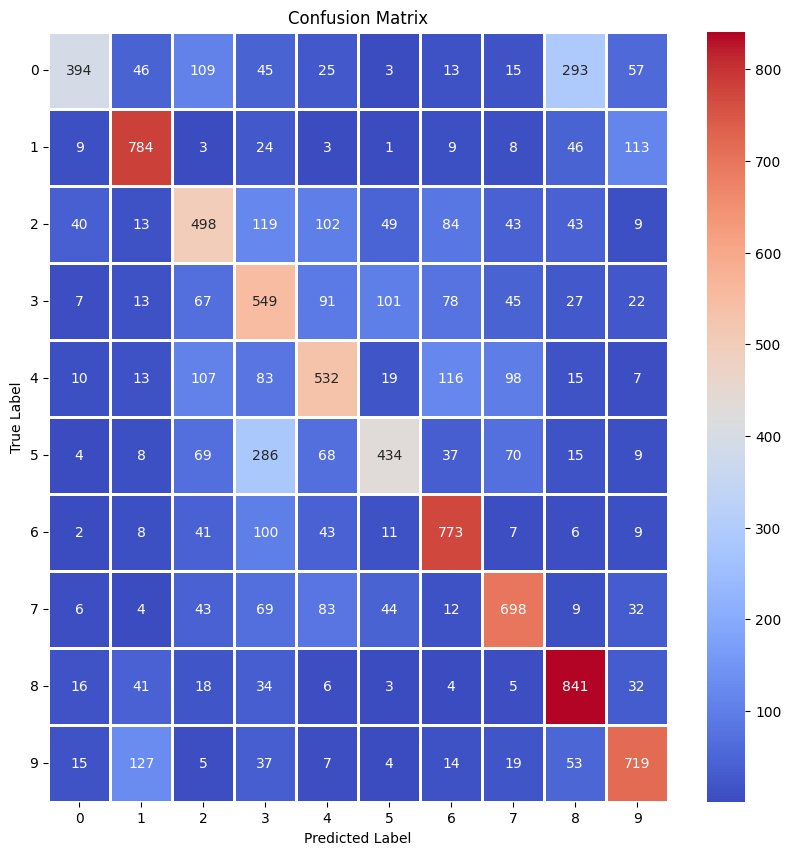

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(classification_report(y_test, y_pred))

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred)


## Continue training on the whole dataset

In [71]:
i=i+1
print(f'--- Increment {i} on a full dataset ---')
model3.fit(X_train, y_train,batch_size=batch_size,epochs=10,verbose=1)
path=f'models/CNN_CIFAR-10_full{i}.h5'
model3.save(path)

--- Increment 10 on a full dataset ---
Epoch 1/10
98/98 [==============================] - 30s 310ms/step - loss: 1.3055 - accuracy: 0.6181
Epoch 2/10
98/98 [==============================] - 30s 310ms/step - loss: 1.1511 - accuracy: 0.6619
Epoch 3/10
98/98 [==============================] - 30s 308ms/step - loss: 1.0832 - accuracy: 0.6813
Epoch 4/10
98/98 [==============================] - 31s 312ms/step - loss: 1.0270 - accuracy: 0.6992
Epoch 5/10
98/98 [==============================] - 30s 310ms/step - loss: 0.9899 - accuracy: 0.7126
Epoch 6/10
98/98 [==============================] - 30s 309ms/step - loss: 0.9577 - accuracy: 0.7253
Epoch 7/10
98/98 [==============================] - 30s 308ms/step - loss: 0.9311 - accuracy: 0.7348
Epoch 8/10
98/98 [==============================] - 30s 308ms/step - loss: 0.8957 - accuracy: 0.7483
Epoch 9/10
98/98 [==============================] - 30s 308ms/step - loss: 0.8880 - accuracy: 0.7502
Epoch 10/10
98/98 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**TODO 3.5.2** Print scores and display confusion matrix

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.94      0.86      0.90      1000
           2       0.71      0.68      0.69      1000
           3       0.66      0.56      0.60      1000
           4       0.70      0.81      0.75      1000
           5       0.71      0.71      0.71      1000
           6       0.84      0.86      0.85      1000
           7       0.78      0.87      0.82      1000
           8       0.88      0.89      0.88      1000
           9       0.91      0.85      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



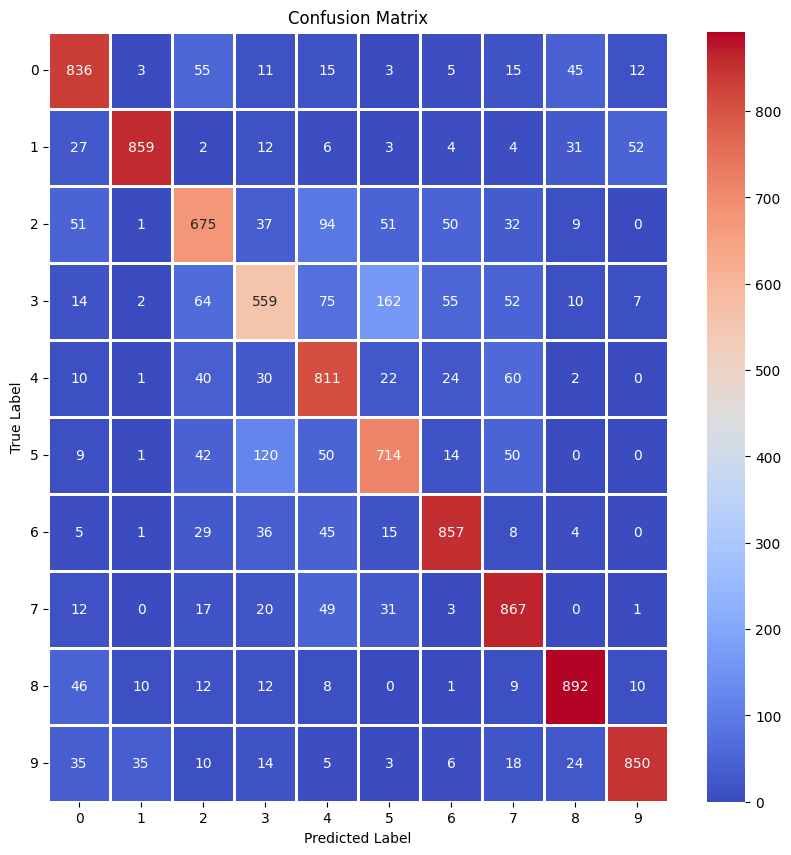

In [72]:
preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

# print scores
print(classification_report(y_test, y_pred))

# display confusion matrix
compute_and_show_confusion_matrix(y_test, y_pred)


**TODO 3.5.3** Repeat the two above steps (training the model and testing) until satisfying results are reached. You may consider writing a loop, which terminates upon certain conditions, e.g. no improvement or reaching a desired score value

**TODO 3.5.4** Perform an experiment, during which models are trained using:
*  10% of data (done)
*  25% of data
*  50% of data
*  75% of data
*  100% of data (done)

Display plots showing differences between the classification scores

(12535, 32, 32, 3)
--- Increment 0 on a subsampled dataset ---
Epoch 1/10
25/25 [==============================] - 9s 306ms/step - loss: 0.9891 - accuracy: 0.7215
Epoch 2/10
25/25 [==============================] - 8s 306ms/step - loss: 0.8077 - accuracy: 0.7819
Epoch 3/10
25/25 [==============================] - 8s 305ms/step - loss: 0.7747 - accuracy: 0.7833
Epoch 4/10
25/25 [==============================] - 8s 303ms/step - loss: 0.7336 - accuracy: 0.8019
Epoch 5/10
25/25 [==============================] - 8s 303ms/step - loss: 0.7200 - accuracy: 0.8093
Epoch 6/10
25/25 [==============================] - 8s 303ms/step - loss: 0.7068 - accuracy: 0.8153
Epoch 7/10
25/25 [==============================] - 8s 304ms/step - loss: 0.6950 - accuracy: 0.8175
Epoch 8/10
25/25 [==============================] - 8s 304ms/step - loss: 0.7027 - accuracy: 0.8156
Epoch 9/10
25/25 [==============================] - 8s 306ms/step - loss: 0.6773 - accuracy: 0.8263
Epoch 10/10
25/25 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
25/25 [==============================] - 8s 304ms/step - loss: 0.6688 - accuracy: 0.8321
Epoch 2/10
25/25 [==============================] - 8s 306ms/step - loss: 0.6505 - accuracy: 0.8406
Epoch 3/10
25/25 [==============================] - 8s 306ms/step - loss: 0.6476 - accuracy: 0.8410
Epoch 4/10
25/25 [==============================] - 8s 304ms/step - loss: 0.6375 - accuracy: 0.8449
Epoch 5/10
25/25 [==============================] - 8s 308ms/step - loss: 0.6248 - accuracy: 0.8542
Epoch 6/10
25/25 [==============================] - 8s 307ms/step - loss: 0.6132 - accuracy: 0.8566
Epoch 7/10
25/25 [==============================] - 8s 302ms/step - loss: 0.6197 - accuracy: 0.8542
Epoch 8/10
25/25 [==============================] - 8s 303ms/step - loss: 0.6077 - accuracy: 0.8566
Epoch 9/10
25/25 [==============================] - 8s 302ms/step - loss: 0.6044 - accuracy: 0.8591
Epoch 10/10
25/25 [==============================] - 8s 302ms/step - loss: 0.5927 - accuracy: 0.8684

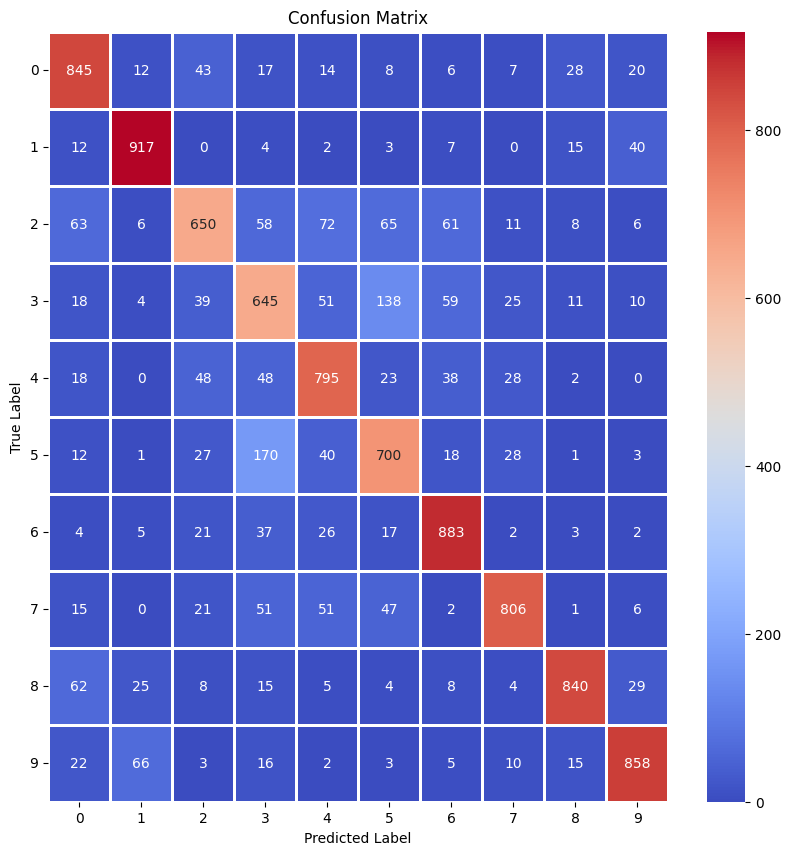

In [75]:
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.25]
y_train_sample =y_train[probs<0.25]

print(X_train_sample.shape)

optimizer = optimizers.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

batch_size = 512
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//5,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

print(classification_report(y_test, y_pred))

compute_and_show_confusion_matrix(y_test, y_pred)


(24892, 32, 32, 3)
--- Increment 0 on a subsampled dataset ---
Epoch 1/10
49/49 [==============================] - 17s 314ms/step - loss: 0.9353 - accuracy: 0.7720
Epoch 2/10
49/49 [==============================] - 15s 310ms/step - loss: 0.8151 - accuracy: 0.8029
Epoch 3/10
49/49 [==============================] - 15s 308ms/step - loss: 0.7697 - accuracy: 0.8142
Epoch 4/10
49/49 [==============================] - 15s 306ms/step - loss: 0.7383 - accuracy: 0.8230
Epoch 5/10
49/49 [==============================] - 15s 308ms/step - loss: 0.7161 - accuracy: 0.8288
Epoch 6/10
49/49 [==============================] - 15s 308ms/step - loss: 0.7065 - accuracy: 0.8305
Epoch 7/10
49/49 [==============================] - 15s 305ms/step - loss: 0.6937 - accuracy: 0.8370
Epoch 8/10
49/49 [==============================] - 15s 307ms/step - loss: 0.6815 - accuracy: 0.8406
Epoch 9/10
49/49 [==============================] - 15s 309ms/step - loss: 0.6770 - accuracy: 0.8416
Epoch 10/10
49/49 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
49/49 [==============================] - 15s 308ms/step - loss: 0.6641 - accuracy: 0.8478
Epoch 2/10
49/49 [==============================] - 15s 306ms/step - loss: 0.6434 - accuracy: 0.8550
Epoch 3/10
49/49 [==============================] - 15s 305ms/step - loss: 0.6501 - accuracy: 0.8542
Epoch 4/10
49/49 [==============================] - 15s 305ms/step - loss: 0.6493 - accuracy: 0.8540
Epoch 5/10
49/49 [==============================] - 15s 307ms/step - loss: 0.6395 - accuracy: 0.8579
Epoch 6/10
49/49 [==============================] - 15s 309ms/step - loss: 0.6319 - accuracy: 0.8627
Epoch 7/10
49/49 [==============================] - 15s 305ms/step - loss: 0.6318 - accuracy: 0.8635
Epoch 8/10
49/49 [==============================] - 15s 306ms/step - loss: 0.6322 - accuracy: 0.8636
Epoch 9/10
49/49 [==============================] - 15s 309ms/step - loss: 0.6232 - accuracy: 0.8658
Epoch 10/10
49/49 [==============================] - 15s 306ms/step - loss: 0.6204 - accura

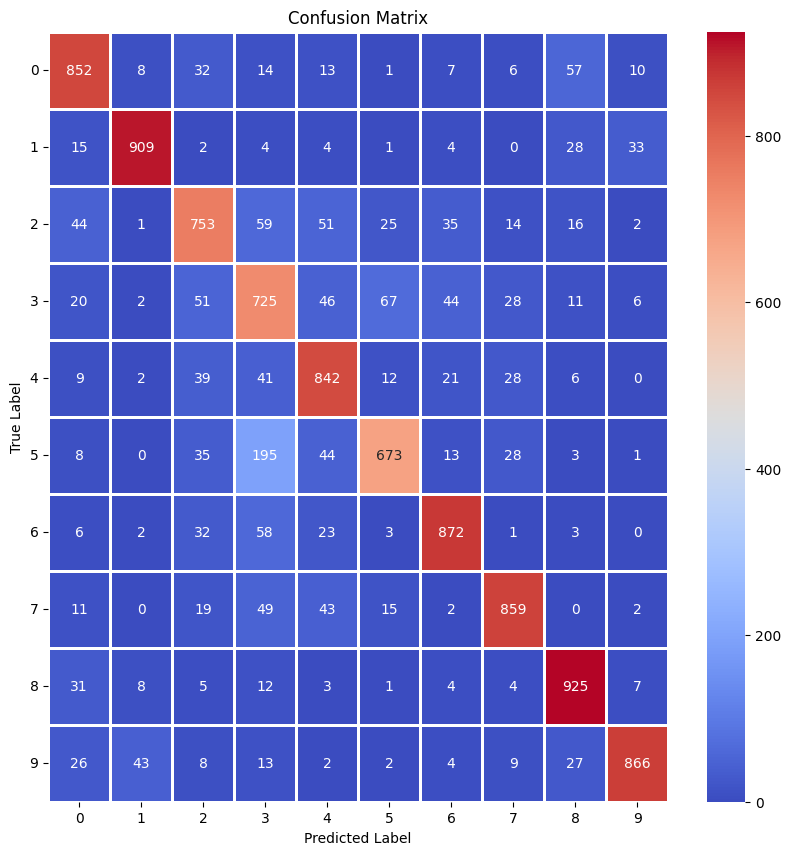

In [76]:
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.5]
y_train_sample =y_train[probs<0.5]

print(X_train_sample.shape)

optimizer = optimizers.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

batch_size = 512
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//5,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

print(classification_report(y_test, y_pred))

compute_and_show_confusion_matrix(y_test, y_pred)


(37602, 32, 32, 3)
--- Increment 0 on a subsampled dataset ---
Epoch 1/10
74/74 [==============================] - 25s 316ms/step - loss: 0.7238 - accuracy: 0.8367
Epoch 2/10
74/74 [==============================] - 23s 313ms/step - loss: 0.6729 - accuracy: 0.8504
Epoch 3/10
74/74 [==============================] - 23s 312ms/step - loss: 0.6534 - accuracy: 0.8534
Epoch 4/10
74/74 [==============================] - 23s 311ms/step - loss: 0.6444 - accuracy: 0.8547
Epoch 5/10
74/74 [==============================] - 23s 310ms/step - loss: 0.6366 - accuracy: 0.8579
Epoch 6/10
74/74 [==============================] - 23s 310ms/step - loss: 0.6221 - accuracy: 0.8628
Epoch 7/10
74/74 [==============================] - 23s 311ms/step - loss: 0.6160 - accuracy: 0.8639
Epoch 8/10
74/74 [==============================] - 23s 309ms/step - loss: 0.6142 - accuracy: 0.8639
Epoch 9/10
74/74 [==============================] - 23s 308ms/step - loss: 0.6078 - accuracy: 0.8658
Epoch 10/10
74/74 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
74/74 [==============================] - 23s 311ms/step - loss: 0.6007 - accuracy: 0.8697
Epoch 2/10
74/74 [==============================] - 23s 311ms/step - loss: 0.6025 - accuracy: 0.8691
Epoch 3/10
74/74 [==============================] - 23s 309ms/step - loss: 0.5958 - accuracy: 0.8729
Epoch 4/10
74/74 [==============================] - 23s 310ms/step - loss: 0.6004 - accuracy: 0.8717
Epoch 5/10
74/74 [==============================] - 23s 307ms/step - loss: 0.5938 - accuracy: 0.8718
Epoch 6/10
74/74 [==============================] - 23s 308ms/step - loss: 0.5894 - accuracy: 0.8762
Epoch 7/10
74/74 [==============================] - 23s 308ms/step - loss: 0.5832 - accuracy: 0.8762
Epoch 8/10
74/74 [==============================] - 23s 309ms/step - loss: 0.5810 - accuracy: 0.8764
Epoch 9/10
74/74 [==============================] - 23s 310ms/step - loss: 0.5770 - accuracy: 0.8788
Epoch 10/10
74/74 [==============================] - 23s 311ms/step - loss: 0.5715 - accura

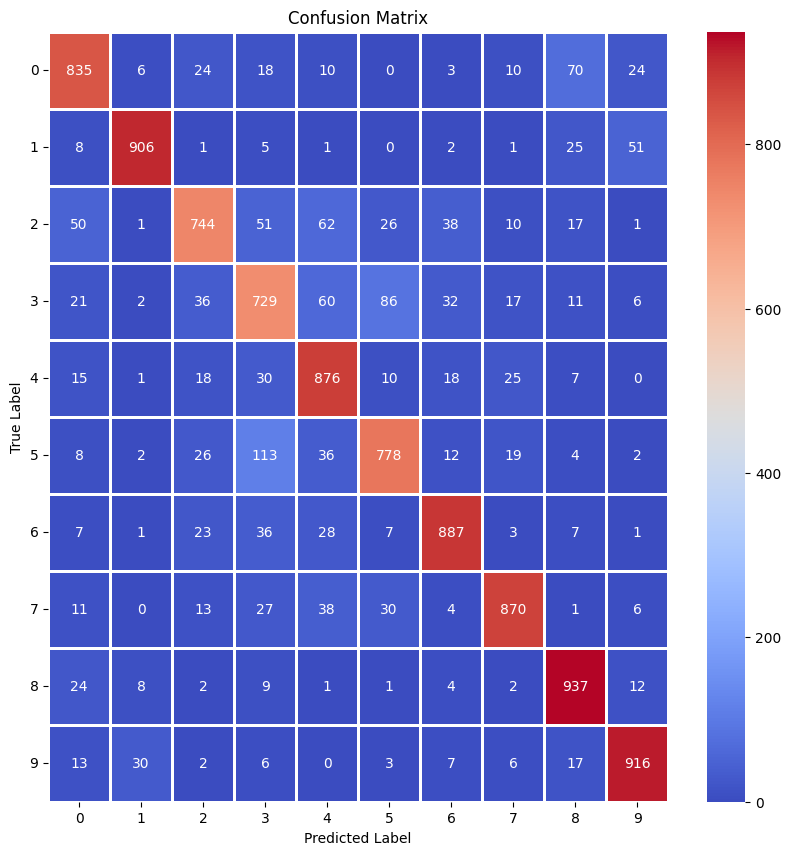

In [77]:
probs = np.random.rand(y_train.shape[0])

X_train_sample = X_train[probs<0.75]
y_train_sample =y_train[probs<0.75]

print(X_train_sample.shape)

optimizer = optimizers.Adam(learning_rate=0.001)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])

batch_size = 512
epochs = 50

for i in range(10):
  print(f'--- Increment {i} on a subsampled dataset ---')
  model3.fit(X_train_sample, y_train_sample,batch_size=batch_size,epochs=epochs//5,verbose=1)
  path=f'models/CNN_CIFAR-10_sub{i}.h5'
  model3.save(path)

preds = model3.predict(X_test)
y_pred = np.argmax(preds,axis=1)

print(classification_report(y_test, y_pred))

compute_and_show_confusion_matrix(y_test, y_pred)
